## **Logistic Regression Implementation**
* Logisitic regression is the **workhorse** of machine learning.

* Before deep learning era, logisitc regression was **the default choice** for solving  real life classification problems with hundreds of thousands of features.

* It works in binary, multi-class and multi-label classification set ups.

* The two limitations of using a linear regression model for classification problems are:

    * the predicted value may exceed the range (0,1)
    
    * error rate increases if the data has outliers.

### **Objective** 
In this notebook, we will implement **binary logistic regression** from scratch and employ it for solving a couple of classification problems.

* In one of the settings, we have linearly separable classes and the other one has non-linear decision boundary between classes.

* The first problem can be addressed with basic logistic regression classifier, while the second problem require an additional step of **polynomial transformation** before using logisitic regression.


### **Importing libraries**

Let's begin by importing basic python libraries that are required for the implementation:

* `numpy` for implementing components of logistic regression in vectrorized form.

* `matplotlib` and `seaborn` for visualization.

* `Math` and `Latex` libraries for proper rendering of mathematical expressions.

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

As a good practice, set the random seed in order to reproduce same results across different runs of this colab.

We will set it to 123, you can set it to any other number of your choice.

In [2]:
np.random.seed(123)

### **Implementation**
In this first part of this exercise, we will implement **individual components** of binary logistic regression one by one :

#### 1. **Model**

* As you know, the logisitic regression classifier calculates the probability of a sample, represented with a feature vector $ \mathbf x $, belonging to class 1: $ P(y=1| \mathbf x) $.

* It has two steps:
  1. **linear combination of features** and obtain $z = \mathbf {w^Tx}$.

  2. The second step applies **sigmoid of logistic activation** on $z$ to obtain the probability:
  
  $$ P(y=1| \mathbf x) = \text {sigmoid}(z)$$
  $$     =\frac{1}{1+e^{-z}}$$

  As we have discussed several times in the past, performing this computation example is not efficient. We can make it efficient by rewriting it in vectorized form.

 The vectorized form enables us to compute probabilities for several examples all at once as follows:

  1. By vectorizing **linear combination of features** leading to efficient computation: 
  $$ \mathbf z_{n \times 1} = \mathbf {X_{n \times m}w_{m \times 1}} $$
    Here : 

  * The feature matrix $ \mathbf X$ has shape $(n,m)$, 

  * The weight vector $\mathbf w$ has m components and 

  * The resulting linear combination $ \mathbf z$ is a vector with n components.
  
Let's implement linear combination in vectorized form.

In [3]:
def linear_combination(X,w):
    z = X@w
    return z

2. By vectorizing **sigmoid or logistic activation** to obtain a vector of probability or activation:

$$ P(y=1| \mathbf X)_{n \times 1}= \text {sigmoid}(\mathbf z_{n \times 1})$$ 

  * The sigmoid function is applied on the vector $\mathbf z$ with $n$ components and the result is **probability** or an **activation vector** with $n$ components.

  Let's implement sigmoid funciton in a vectorized form.

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Further we apply vectorized prediction or inference function on activations to obtain a class label.

 Specifically, if **activation or probability > threshold**, then we label the sample with class 1, else 0.

In [5]:
def predict(X ,w,threshold:float):
    return np.where(sigmoid(linear_combination(X,w)) > threshold,1,0)

Let's label a couple of samples through the code that we have written so far : 

* Two samples - each with two features : `np.array([1,20,2],[1,2,2])` where, the first one is a dummy feature set to 1 corresponding to the bias.

* weight vector : `np.array([-1,0,1])` 


In [6]:
feature_matrix = np.array([[1,20,2],[1,2,2]])
weight_vector = np.array([-1,0,1])

In [7]:
print('Shape of feature matrix : ', feature_matrix.shape)
print('Shape of weight vector : ', weight_vector.shape)

Shape of feature matrix :  (2, 3)
Shape of weight vector :  (3,)


In [8]:
class_labels = predict(feature_matrix, weight_vector, 0.5)

print('Shape of class labels : ', class_labels.shape)
print('The class label vector : ', class_labels)

Shape of class labels :  (2,)
The class label vector :  [1 1]


Both the sample are labeled with class 1.

#### 2. **Loss function**

Next we will implement binary cross entropy (BCE) loss with regularization. The base loss without regularization can be obtained by setting the regularizaiton rate $ \lambda$ to 0.

* The generic form of loss is as follows: 

        BCE = BCE on training examples +  λ regularization penalty

* Note that the **regularization rate $ \lambda$** controls the amount of regularization penalty to be used.


* By setting $\lambda =0$, we get binary cross entropy loss:
  
                BCE = BCE on training examples + 0  
    
                    = BCE on training examples

* We use both $L_{1}$ and $L_{2}$ regularization in logistic regression.

* Using $L_1$ regularization, the loss function is calculated as follows:

\begin{equation} 
J(\mathbf w)=-\left( \sum_{i=1}^{n}y^{(i)} \text {log}(\text {sigmoid}(\mathbf w^Tx^{(i)}))+(1-y^{(i)}) \text {log}(1- \text {sigmoid}(\mathbf w^Tx^{(i)}))\right) + \frac{\lambda}{2} ||\mathbf w||
\end{equation}

* Using $L_2$ **regularization**, the loss function is calculated as:

\begin{equation} 
J(\mathbf w)=-\left( \sum_{i=1}^{n}y^{(i)} \text {log}(\text {sigmoid}(\mathbf w^Tx^{(i)}))+(1-y^{(i)}) \text {log}(1- \text {sigmoid}(\mathbf w^Tx^{(i)}))\right) + \frac{\lambda}{2} ||\mathbf w||^2
\end{equation}

In order to write the loss in vectorized form, we will first calculate the term inside summation in vectorized form : 

\begin{equation} 
\mathbf e = \mathbf y \text {log}( \text {sigmoid}\mathbf {(Xw))}+ (1-\mathbf y)\text{log}(1-\text{sigmoid}(\mathbf {Xw})) 
\end{equation}


With this, the loss becomes:
\begin{equation} 
J(\mathbf w)=-\mathbf 1_{1 \times n}^T \mathbf e_{n \times 1}
\end{equation}

Adding $L_2$ penalty, we get :
\begin{equation} 
J(\mathbf w)=-\mathbf 1^T \mathbf e+\lambda \mathbf w^T \mathbf w
\end{equation}

Adding $L_1$ penalty, we get:

\begin{equation} 
J(\mathbf w)=-\mathbf 1^T \mathbf e +\lambda \mathbf 1^T  |\mathbf w|  
\end{equation}

The loss function implements vectorized loss calculation with actual label vector, activation vector, weight vector, and $L_1$ and $L_2$ regularization rates.

Set the regularization rate that is not needed to 0.

If we set the regularization rates such that there sum is 1, we get elastic net regularization. In other words, for **elasticnet** classifier, we have : 

                                                    l1_reg_rate + l2_reg_rate = 1

The loss function returns a scalar quantity that denotes the loss on all training examples for a particular choice of the weight vector.

In [9]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    # sigmoid_vector = z = X@w

    return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector))))+ l2_reg_rate * np.dot(np.transpose(weight_vector), weight_vector) + l1_reg_rate * np.sum(np.abs(weight_vector))

### 3. **Optimization**

Next we will implement optimization. For that we will make use of iterative optimization techniques like gradient descent (GD), mini-batch gradient descent (MBGD) or stochastic gradient descent (SGD).

We will demonstrate GD in this notebook and for that we will adopt the GD implementation from linear regression.

We need to modify the gradient update rule such that it is suitable for logistic regression loss:

* **STEP 1** : Calculate gradient descent loss function and 

* **STEP 2** : Scale the gradient with learning rate and use it for updating the weight vector.


#### Gradient of loss function.
The gradient of loss function can be calculated (in vectorized form) as follows:

\begin{equation} 
\frac {\partial}{\partial \mathbf w}J(\mathbf w)= \mathbf X^T(\text {sigmoid}(\mathbf {(Xw)-y})+ \lambda \mathbf w
\end{equation}

        where : 
* sigmoid $(\mathbf {Xw})$ is the sigmoid activation vector of samples and 

* $\mathbf y$ is a label vector

* $\mathbf w$ is a weight vector

* $\lambda$ is a regularization rate

It is implemented with `calculate_graidient` function that takes feature matrix $\mathbf X$, label vector $\mathbf y$, weight vector $\mathbf w$ and regualarization rate $\lambda$ as arguments and efficiently calculates gradient of loss function w.r.t the weight vector in vectorized form.


In [10]:
def calculate_gradient(X,y,w,reg_rate):
    return np.transpose(X)@(sigmoid(linear_combination(X,w))-y)+reg_rate*w

As part of the implementation, we store loss and weight vectors in each GD step as a class member  variable : 

* The step-wise loss is used for plotting a learning curve in order to ensure that the model is training as expected.

* The step-wise weight vector is useful in studying the **trajectory of gradient descent** in the loss landscape.

### **Logistic Regression Class Implementation**

We combine these different components into a single python class with name `LogisticRegression`.

It has the following class member variables : 
1. Weight vector

2. Loss and weight vectors in each GD step.


In [11]:
class LogisticRegression(object):
  #y_hat = sigmoid(X@w)

  def set_weight_vector(self,w):
    self.w = w 
  
  def linear_combination(self,X):
    #z=xw 
    return X@self.w 

  def sigmoid(self,z):
    return 1/(1+np.exp(-z)) 

  def activation(self,X):
    #act = sigmoid(Xw)
    return self.sigmoid(self.linear_combination(X))

  def predict(self,X, threshold:float=0.5):
    return (self.activation(X)>threshold).astype(int)

  def loss(self,X,y,reg_rate:float):
    predicted_prob = self.activation(X) 
    return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))) + reg_rate*np.dot(np.transpose(self.w),self.w)
  
  def calculate_gradient(self,X,y,reg_rate):
    return X.T@(self.activation(X)-y) + reg_rate*self.w 

  def update_weights(self,grad,lr):
    return self.w -lr*grad

  def gd(self,X,y, num_epochs,lr, reg_rate):
    self.w = np.zeros(X.shape[1])
    self.w_all=[] 
    self.err_all=[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y,reg_rate) #grad=djdw 
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.update_weights(dJdW,lr)
    return self.w

In this section, we implemented binary logistic regression classifier from scratch. 

First we implemented all its components in vectorized form and then clubbed all of them together in a python class.

In the next section, we will use this implementation to solve a couple of classificiation problems.

### DEMO 1 : *Logistic regression for linearly-separable binary classification.*
In the first experiment, we will use logistic regression to learn decision boundary between two linearly separable classes.

##### **STEP 1** : Generate two linearly separable classes with 25 samples each. Each example is represented with two features.

In [12]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1,2)-1
    x1 = np.random.normal(size=50).reshape(-1,2)+1
    
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(x1.shape[0]),np.ones(x1.shape[0])]).astype(int) 

In [13]:
feature_matrix , label_vector = create_toy_data()
print('Shape of feature matrix : ', feature_matrix.shape)
print('Shape of label vector : ', label_vector.shape)

Shape of feature matrix :  (50, 2)
Shape of label vector :  (50,)


As a sanity check, compare the first element of shape of feature matrix and label vector. Make sure they are identical.

In [14]:
assert feature_matrix.shape[0] == label_vector.shape[0]

##### **STEP 2** : Add a dummy feature corresponding to this bias. 

* We make use of polynomial feature transformation code that we have been using in the previous notebooks.

* The dummy feature can be added by performing polynomial transformation of degree 1.

##### Polynomial transformation

In [15]:
import itertools
import functools

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))]

    for degree in range(1, degree+1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x*y, items))
    return np.asarray(features).transpose()

In [16]:
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)

##### **STEP 3 :** Separate data into training and test sets.

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(feature_matrix_bias, label_vector, test_size=0.2)

It is good practice to assert that the training feature matrix and labels have the same number of rows. The same assertion should be extended to the test set.

In [18]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

##### **STEP 4** : Let's visualize the training data to get an idea of its distribution.

Note that it won't be possible to visualize the real world datasets as there are many features. 

In this case, we have only two features in our dataset and hence we can visualize it.

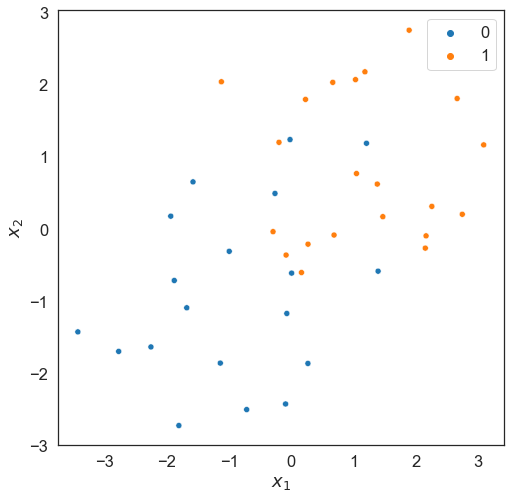

In [19]:
sns.set_style('white')
f = plt.figure(figsize=(8, 8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:, -2], y=x_train[:, -1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

##### **STEP 5 :** We are all set to training a logisitic regression on this problem.

1. First instantiate a logistic regression object.

2. Train the model with gradient descent procedure on the given training set.

In [20]:
log_reg = LogisticRegression() 
log_reg.gd(x_train, y_train, num_epochs=1000, lr=0.01, reg_rate=0)

array([-0.116632  ,  1.203628  ,  1.05257202])

It is good practice to examine the learning curve to make sure the model is able to learn with the current training set up. 

In cases, where the model is learning, the loss will reduce from one iteration to the next in gradient descent.

In [21]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)), err, 'g-')
    plt.xlabel('Number of iterations : ')
    plt.ylabel('$\mathbf {J(w)}$')
    plt.show()

We use loss values stored during each step of GD for plotting the learning curve.

Here is our learning curve-the iteration number is on x-axis and the loss is on y-axis.

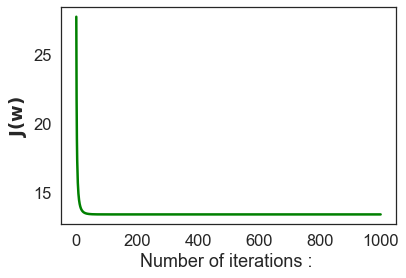

In [22]:
plot_learning_curve(log_reg.err_all)

Note that the loss drops smoothly as we proceed with GD.

This is an ideal learning curve for the model training task.

##### **STEP 6 :** Model Visualization

In [23]:
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

def visualize_model(X_train, labels, log_reg, degree=1):
    f = plt.figure(figsize=(8, 8))

    #compute xlim and ylim
    x1_min = np.min(x_train[:, 1])
    x1_max = np.max(x_train[:, 1])
    x2_min = np.min(x_train[:, 2])
    x2_max = np.max(x_train[:, 2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                                    np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = log_reg.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:, 1], y=X_train[:, 2], hue=labels)

    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha=0.5,
                levels=np.linspace(0, 1, 3))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

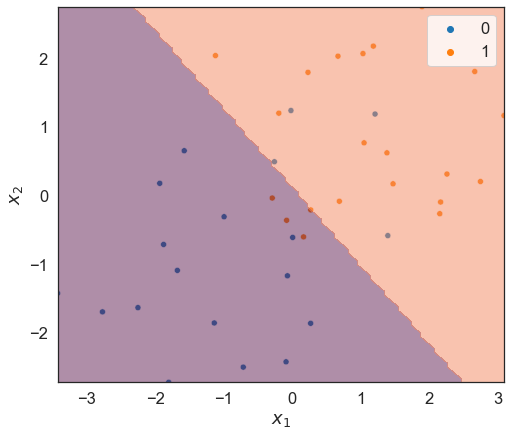

In [24]:
visualize_model(x_train, y_train, log_reg)

Our model learnt a reasonable decision boundary that is able to separate most point from two classes.

##### **STEP 7 :** Model Evaluation

The next step is to use the model for making predictions on the new inputs. 

Let's predict labels on the test set-that was set aside for evaluating model performance.

In [25]:
y_test_hat = log_reg.predict(x_test)

We compare these predictions with the actual labels and generate a classification report that includes several metrics like confusion matrix, precision, recall, F1-score etc.

In [26]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_test_hat,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### DEMO 2 : *Polynomial least square classification*

In the second demonstration, we will use logistic regression to fit a circular decision boundary between two classes.


##### **STEP 1:** For this demonstration , we will generate samples from two classes such that they are separated by a circular decision boundary.

In [27]:
from sklearn.datasets import make_circles 
feature_matrix ,label_vector = make_circles()

print('Shape of feature matrix : ', feature_matrix.shape)
print('Shape of label vector : ', label_vector.shape)

Shape of feature matrix :  (100, 2)
Shape of label vector :  (100,)


As a sanity check, compare the first element of shape of feature matrix and label vector. Make sure they are identical.

In [28]:
assert feature_matrix.shape[0] == label_vector.shape[0]

##### **STEP 2**: As the next step, we will make use of polynomial feature transformation to transform the features to polynomials of desired degree.

**Note**:

* It is important to note that we would not have an idea about an appropriate degree for polynomial transformation in real world problem setting.

* We perform hyperparameter tuning to determine the right degree for polynomial transformation.

* Another option is to use model diagnostic tools-in case the model is underfitting, we can make model fit better by increasing the degree of the polynomial. 

* On the other hand, if the model is overfitting, we can either reduce the degree of polynomial or increase regularization penalty.


We use `polynomial_transform` with `degree =2` for transforming input features into the second order polynomial features.

In [29]:
x_poly = polynomial_transform(feature_matrix, degree=2)

Polynomial feature transformation results in more features. 

Let's compare number of feature before and after the transformation.

In [30]:
print('Number of features before transformation : ',feature_matrix.shape[1])
print('Number of features after transformation : ',x_poly.shape[1])

Number of features before transformation :  2
Number of features after transformation :  6


The four additional features are as follows:

1. Dummy feature corresponding to bias. It is set to 1.

2. Squares of the original features-that adds two more features: $x_1^2, x_2^2$

3. One more feature corresponding to interaction between two features: $x_1,x_2$.

Let's look at the first 5 samples from original and transformed feature matrix : 

In [31]:
feature_matrix[:5]

array([[ 0.18738131,  0.98228725],
       [ 0.05023242, -0.79842138],
       [-0.72896863, -0.68454711],
       [ 0.34062343,  0.72386164],
       [ 0.77486653, -0.19895191]])

In [32]:
x_poly[:5]

array([[ 1.        ,  0.18738131,  0.98228725,  0.03511176,  0.18406228,
         0.96488824],
       [ 1.        ,  0.05023242, -0.79842138,  0.0025233 , -0.04010663,
         0.6374767 ],
       [ 1.        , -0.72896863, -0.68454711,  0.53139526,  0.49901336,
         0.46860474],
       [ 1.        ,  0.34062343,  0.72386164,  0.11602432,  0.24656424,
         0.52397568],
       [ 1.        ,  0.77486653, -0.19895191,  0.60041814, -0.15416118,
         0.03958186]])

Note : 
* The second and the third feature are the original input features, whereas the first, fourth, fifth and sixth features are newly added features during transformation.

* The first feature from the transformed feature corresponds to the bias and is set to 1 for all the samples.

##### **STEP 3**: Split the training set consisting of transformed feature matrix and label vector into train and test sets.

For this - we will make use of `train_test_split` util from `sklearn` that takes feature matrix and label vector as input and returns train and test feature matrices and label vectors.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, label_vector)

It is good practice to assert that the training feature matrix and labels have same number of rows. The same assertion should be extended to the test set.

In [34]:
assert x_train.shape[0]==y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

##### **STEP 4 :** Next we plot the training data in original feature space and check its distribution.

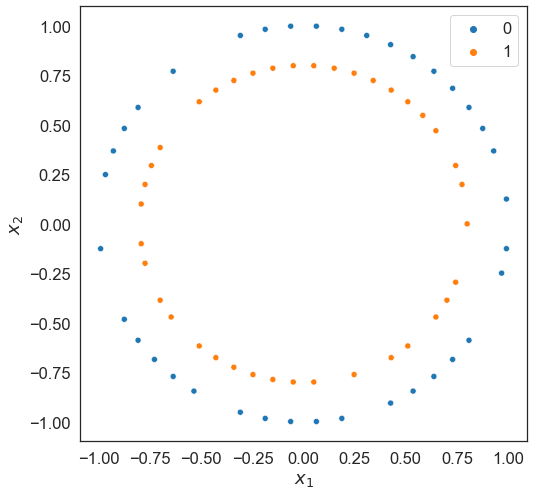

In [35]:
sns.set_style('white')
f = plt.figure(figsize=(8, 8))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:, 1], y=x_train[:, 2], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

##### **STEP 5 :** Train a logistic regression model on the training set and visualize the model.


In [36]:
log_reg_poly = LogisticRegression() 
log_reg_poly.gd(x_train, y_train, reg_rate=0,num_epochs=10000, lr=1e-2)

array([ 20.3236705 ,  -0.09956493,   0.04608154, -24.77274063,
        -0.07925223, -24.88454228])

We use loss values stored during each step of GD for plotting the learning curve.

Here is our learning curve-the iteration number is on x-axis and the loss is on y-axis.

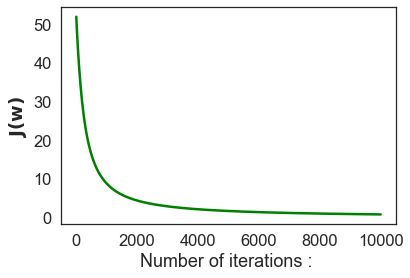

In [37]:
plot_learning_curve(log_reg_poly.err_all)

##### **STEP 6 :** Visualizing the model

We will visualize the decision boundary learnt by the logistic regression classifier.

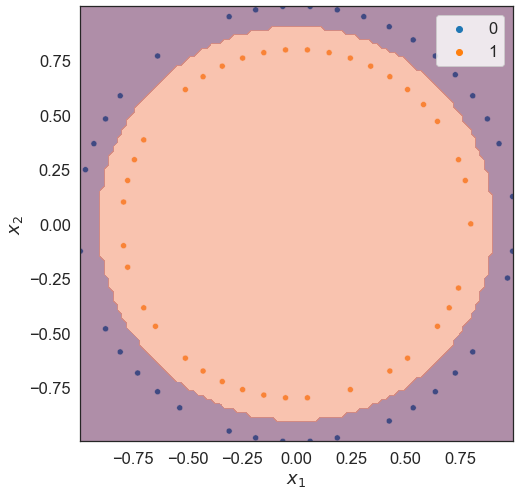

In [38]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

##### **STEP 6**: Model evaluation
The next step is to use the model for making predictions on the new inputs. 

Let's predict labels on the test set-that was set aside for evaluating model performance.

In [39]:
y_test_hat = log_reg_poly.predict(x_test)

We compare these predictions with the actual labels and generate a classification report.

In [40]:
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



**NOTE :** 

Observe that we have a perfect classifier here. 

It was a toy settting-however such a thing may not be possible on the real world dataset.